In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
data = pd.read_csv('data olah.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [12]:
data.drop(data.columns[2410:3579], axis=1, inplace=True)
data.head(5)

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,24.728888,27.64467,24.893251,27.215405,26.310278,24.307577,29.245514,29.070126,30.490877,35.01845,...,17.665596,17.521635,18.051397,17.52665,17.180534,17.99281,17.179358,17.089285,17.443895,DA
1,1290.423500,1190.24150,1224.700700,1160.337400,1100.303100,1088.031500,1152.384600,1154.704500,1115.064600,1319.14640,...,150.075820,150.250370,142.590470,143.92473,148.038850,154.53412,153.505140,149.336000,144.941860,DA
2,9819.987000,9687.30800,9957.726000,9896.959000,10370.940000,10643.110000,10709.778000,11047.445000,11019.559000,10969.06800,...,1462.006700,1473.770300,1483.637200,1470.29220,1457.449600,1450.70750,1469.381200,1475.331200,1460.837900,DA
3,1093.884500,1043.11580,1102.687500,1149.345100,1114.538500,1140.821400,1153.040000,1195.502800,1167.717200,1147.95520,...,136.972170,140.127240,140.010470,140.37068,137.124980,138.57338,135.967210,135.260400,138.557480,DA
4,1945.595200,1919.27200,1890.047000,2007.562900,1974.344600,1933.755500,2028.300500,2040.959200,2060.863300,2075.57150,...,211.261810,214.697770,217.529720,214.75264,221.029900,217.97780,217.672780,212.324870,216.794740,DA


In [13]:
dadaz = [
    'DA' 
]

data['wd_subclass'] = np.where(data['wd_subclass'].isin(dadaz), 1, 0)

In [14]:
data['wd_subclass'].value_counts(normalize=True)*100

1    57.336078
0    42.663922
Name: wd_subclass, dtype: float64

# Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape

((2720, 2410), (681, 2410))

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


rfc = RandomForestClassifier(n_estimators=200, max_features = 500)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=500, n_estimators=200)

In [19]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(3)

,feature,importance
47,3889.5566,0.047520
48,3890.4524,0.028267
46,3888.6611,0.027082


In [20]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

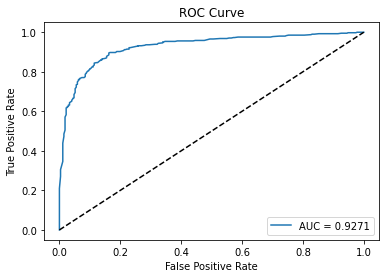

In [21]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [22]:
roccurve = pd.DataFrame({'fpr' : fpr,
                  'tpr' : tpr,
                  'threshold' : tr})
roccurve[(roccurve.threshold >= 0.49) & (roccurve.threshold <= 0.52)]

,fpr,tpr,threshold
74,0.151292,0.868293,0.520
75,0.154982,0.870732,0.515
76,0.154982,0.878049,0.510
77,0.162362,0.885366,0.505
78,0.162362,0.890244,0.490


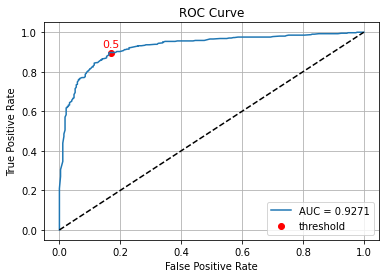

In [23]:
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.scatter(x = 0.169742, y = 0.892683, color = 'r',  label = 'threshold')
plt.annotate('0.5', xy=[0.169742, 0.922683],  ha = 'center', color='r', size = 11)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

In [24]:
y_pred = rfc.predict(X_test)

In [25]:
#plt.figure(figsize=(14,7))
#sns.histplot(x=1 - y_pred_proba_test,  bins = 50, color = 'firebrick')
sns.histplot(x=1 - y_pred_proba_test,  bins = 15, color = 'firebrick', kde=True)
plt.xlabel('Predicted Probability of Correct Class')
plt.ylabel('Loss')
plt.title('Cross-Entropy')
plt.grid()

NameError: name 'y_pred_proba_test' is not defined

In [ ]:
wd_subclass = []
for i in y_test :
    if i == 0:
        wd_subclass.append('Katai putih DAZ')
    elif i == 1 :
        wd_subclass.append('Katai putih DA')
dh = pd.DataFrame({'wd_subclass' : wd_subclass})

In [ ]:
#plt.figure(figsize=(14,7))
sns.histplot(x=y_pred_proba_test, kde=True, hue = dh.wd_subclass, palette = 'Set2_r')
plt.axvline(x = 0.5, color = 'r', label = 'threshold = 0.5')
plt.annotate('threshold = 0.5', xy=[0.48, 125],  ha = 'center', rotation = 90, color='r', size = 10)
plt.xlabel('Predicted Probability')
plt.grid()

In [ ]:
y_pred_proba_test = rfc.predict_proba(X_test)[:][:,1]
y_pred_test = rfc.predict(X_test)

test = pd.DataFrame({'y_pred_proba' : y_pred_proba_test,
                    'y_pred' : y_pred_test})
test.head(3)

In [ ]:
y_pred_proba_train = rfc.predict_proba(X_train)[:][:,1]
y_pred_train = rfc.predict(X_train)

test = pd.DataFrame({'y_pred_proba' : y_pred_proba_train,
                    'y_pred' : y_pred_train})
test.head(3)

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba

In [ ]:
y_pred_proba_test

In [ ]:
y_pred_0 = rfc.predict_proba(X_test)[:][:,0]

In [ ]:
pp=1

# Properti data

In [ ]:
print(len(data[data.wd_subclass == 'DA']))
print(len(data[data.wd_subclass == 'DAZ']))

In [ ]:
1950 + 1451

In [ ]:
#rerata SNR

obsid = pd.read_csv('data olah dg scid.csv')
obsid.head()

In [ ]:
lamost = pd.read_csv('lamost_full')
lamost.head()

In [ ]:
fluxobsid = []
for i in lamost.index:
    fluxobsid.append('FLUX'+str(lamost.obsid[i]))
lamost['index'] = fluxobsid

In [ ]:
df = pd.merge(lamost,obsid, how='inner')

In [ ]:
lamost = df.copy()
snr = lamost[(lamost.snru != -9999) & (lamost.snru != 9999) 
             & (lamost.snrg != -9999) & (lamost.snrg != 9999) 
             & (lamost.snrr != -9999) & (lamost.snrr != 9999) 
             & (lamost.snri != -9999) & (lamost.snri != 9999) 
             & (lamost.snrz != -9999) & (lamost.snrz != 9999)]

In [ ]:
meansnr = (snr.snru + snr.snrg + snr.snrr + snr.snri + snr.snrz)/5
snr['meansnr'] = meansnr

In [ ]:
snr.meansnr[snr.meansnr<= 100].mean()

In [ ]:
snr.meansnr.min()

In [ ]:
len(snr[snr.meansnr <=100])

In [ ]:
len(snr[snr.meansnr > 100])